In [1]:
import gym
import matplotlib.pyplot as plt
import pprint
import numpy as np
import random
from tqdm import tqdm
import torch

In [74]:
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)
plt.style.use('ggplot')

In [71]:
# try: 
#     env = gym.make('FrozenLakeNotSlippery-v0', is_slippery=True)
# except:
#     from gym.envs.registration import register
#     register(
#         id='FrozenLakeNotSlippery-v0',
#         entry_point='gym.envs.toy_text:FrozenLakeEnv')
# finally:
#     env = gym.make('FrozenLakeNotSlippery-v0', is_slippery=False)

env = gym.make('FrozenLake-v1', is_slippery=True)

In [85]:
class Agent:
    def __init__(self, n_states, n_actions, gamma=1, alpha=0.1, epsilon=0, kappa=0.001):
        self.number_of_states = n_states
        self.number_of_actions = n_actions
        self.seed = 1
        self.q_values = torch.zeros([n_states, n_actions])
        self.tau = torch.zeros([n_states, n_actions])
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.steps = []
        self.rewards = []
        
    def summary(self):
        print(f'Number of states: {self.number_of_states}')
        print(f'Number of actions: {self.number_of_actions}')
        print(f'Gamma value: {self.gamma}')
        print(f'Alpha value or step size: {self.alpha}')
        print(f'Epsilon or exploration probability: {self.epsilon * 100} %')
    
    def policy(self, state):
        # random.seed(self.seed)
        random_value =  (torch.rand(1, agent_1.number_of_actions)/1000)[0]
        if random.random() > self.epsilon:
            action = self.argmax(self.q_values[state, :] + random_value)
        else:
            # print(self.number_of_actions)
            action = random.choice(range(self.number_of_actions))
        return action

    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action values
        Returns:
            action (int): an action with the highest value
        """
        # random.seed(self.seed)
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return random.choice(ties)
    
    def update(self, state, action, reward, new_state):
        q_sa = self.q_values[state, action]
        gamma = self.gamma
        alpha = self.alpha
        q_sa_max = torch.max(self.q_values[new_state, :])
        q_sa = q_sa + alpha * (reward + gamma * q_sa_max - q_sa)
        self.q_values[state, action] = q_sa
        
    def run(self, episodes, avg=30):
        list_of_steps = []
        list_of_rewards = []
        for i in tqdm(range(avg), position=0, leave=True):
            steps = []
            rewards = []
            # self.seed = i
            for __ in tqdm(range(episodes), position=0, leave=True):
                state = env.reset()
                done = False

                # check if the terminal state is achieved
                step = 0
                while not done:
                    action = self.policy(state)
                    self.tau[state, action] += 1
                    new_state, reward, done, info = env.step(action)

                    self.update(state, action, reward, new_state)
                    step += 1

                    state = new_state
                steps.append(step)
                rewards.append(reward)
            list_of_steps.append(steps)
            list_of_rewards.append(rewards)
        self.steps = torch.mean(torch.tensor(list_of_steps, dtype=torch.float), 0)
        self.rewards = torch.mean(torch.tensor(list_of_rewards, dtype=torch.float), 0)
        
    def results(self):
        fig, axis = plt.subplots(2, 1)
        axis[0].bar(torch.arange(len(agent_1.rewards)), agent_1.rewards, alpha=0.6, color='green')
        axis[0].set_title('rewards')
        axis[1].bar(torch.arange(len(agent_1.steps)), agent_1.steps, alpha=0.6, color='red')
        axis[1].set_title('steps')
        print('#' * 80)
        print(f'average rewards: {torch.mean(agent_1.rewards)}')
        print(f'average last 100 rewards: {torch.mean(agent_1.rewards[-100:])}')
        print('#' * 80)

        print(f'average steps: {torch.mean(agent_1.steps)}')
        print(f'average steps 100 rewards: {torch.mean(agent_1.steps[-100:])}')
        print('#' * 80)

                

Number of states: 16
Number of actions: 4
Gamma value: 0.95
Alpha value or step size: 0.9
Epsilon or exploration probability: 0 %


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:22<00:00, 22.30s/it]


################################################################################
average rewards: 0.42899999022483826
average last 100 rewards: 0.5199999809265137
################################################################################
average steps: 48.47800064086914
average steps 100 rewards: 59.20000076293945
################################################################################


tensor([[    0.0009,     0.0007,     0.0123,     0.0007],
        [    0.0001,     0.0000,     0.0000,     0.0112],
        [    0.0002,     0.0001,     0.0003,     0.0112],
        [    0.0000,     0.0000,     0.0002,     0.0088],
        [    0.0167,     0.0000,     0.0000,     0.0005],
        [    0.0000,     0.0000,     0.0000,     0.0000],
        [    0.0000,     0.0000,     0.0229,     0.0000],
        [    0.0000,     0.0000,     0.0000,     0.0000],
        [    0.0000,     0.0000,     0.0001,     0.0267],
        [    0.0002,     0.1079,     0.0000,     0.0000],
        [    0.8595,     0.0000,     0.0000,     0.0000],
        [    0.0000,     0.0000,     0.0000,     0.0000],
        [    0.0000,     0.0000,     0.0000,     0.0000],
        [    0.0000,     0.0001,     0.1187,     0.0000],
        [    0.0000,     0.4830,     0.0000,     0.0000],
        [    0.0000,     0.0000,     0.0000,     0.0000]])

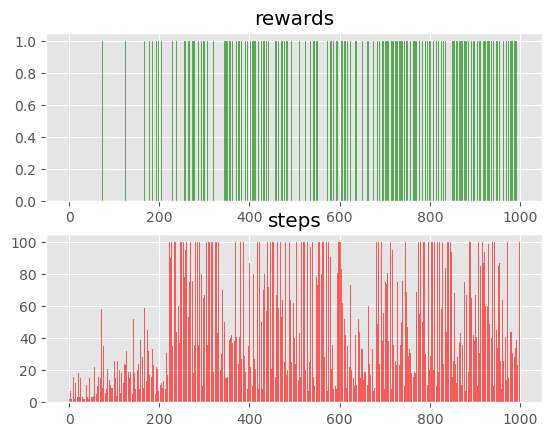

In [89]:
agent_1 = Agent(env.observation_space.n, env.action_space.n, alpha=0.9, gamma=0.95, epsilon=0)
agent_1.summary()
agent_1.run(1000, avg=1)
agent_1.results()
agent_1.q_values

In [84]:
 (torch.rand(1, agent_1.number_of_actions)/1000)[0]

tensor([0.0006, 0.0010, 0.0008, 0.0004])